### Importando Librerias

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor


### Cargando el DataSet

In [46]:
df_foods = pd.read_csv('../Data/nutrition.csv')

In [47]:
df_foods.head(6)

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
5,5,"Cauliflower, raw",100 g,25,0.3g,0.1g,0,30.00 mg,44.3 mg,57.00 mcg,...,0.28 g,0.130 g,0.034 g,0.031 g,0.00 mg,0.0 g,0.76 g,0.00 mg,0.00 mg,92.07 g


### DataSet con las columnas o *features* relevantes para el problema.
Primeramente se va crear un nuevo dataset con aquellas columnas o features, que vamos a necesitar para nuestros modelos, esto debido a  que hay muchos valores nutricionales irrevelantes para este caso en particular, pero para otro tipo de analisis si que podrian ser importantes tomarlas en cuenta, se tomara unicamente las siguientes columnas para el analisis:
* calories --> sera nuestra 'target' para las regresiones
* total_fat --> muestra el total de grasas de cada alimento
* cholesterol --> indica el colesterol de cada alimento
* carbohydrate --> indica los carbohidratos de cada alimento
* sugars --> indica la cantidad total de azucares de cada alimento



In [48]:
df_foods = df_foods[['calories','total_fat','cholesterol','carbohydrate','sugars']]

In [49]:
df_foods.head()

,calories,total_fat,cholesterol,carbohydrate,sugars
0,381,0.1g,0,91.27 g,0.00 g
1,691,72g,0,13.86 g,3.97 g
2,25,0.2g,0,5.88 g,3.53 g
3,367,2.4g,0,73.13 g,1.84 g
4,144,2g,1mg,30.40 g,24.32 g


In [50]:
df_foods.describe()

,calories
count,8789.000000
mean,226.283878
std,169.862001
min,0.000000
25%,91.000000
50%,191.000000
75%,337.000000
max,902.000000


In [51]:
df_foods.isna().sum()

calories        0
total_fat       0
cholesterol     0
carbohydrate    0
sugars          0
dtype: int64

### Eliminando las unidades de medida en los valores de las columnas

In [52]:
df_foods['total_fat']=df_foods.loc[:,'total_fat'].replace({'g':''},regex=True)
df_foods['cholesterol']=df_foods.loc[:,'cholesterol'].replace({'mg':''},regex=True)
df_foods['carbohydrate']=df_foods.loc[:,'carbohydrate'].replace({'g':''},regex=True)
df_foods['sugars']=df_foods.loc[:,'sugars'].replace({'g':''},regex=True)

### Convertir tipo Object a Numeric

In [53]:
df_foods['total_fat']=pd.to_numeric(df_foods['total_fat'])
df_foods['cholesterol']=pd.to_numeric(df_foods['cholesterol'])
df_foods['carbohydrate']=pd.to_numeric(df_foods['carbohydrate'])
df_foods['sugars']=pd.to_numeric(df_foods['sugars'])

### Definiendo las variables independientes *X* y la variable dependiente *y*

In [54]:
X = df_foods[['total_fat','cholesterol','carbohydrate','sugars']]
y = df_foods['calories']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(7031, 4) (1758, 4)


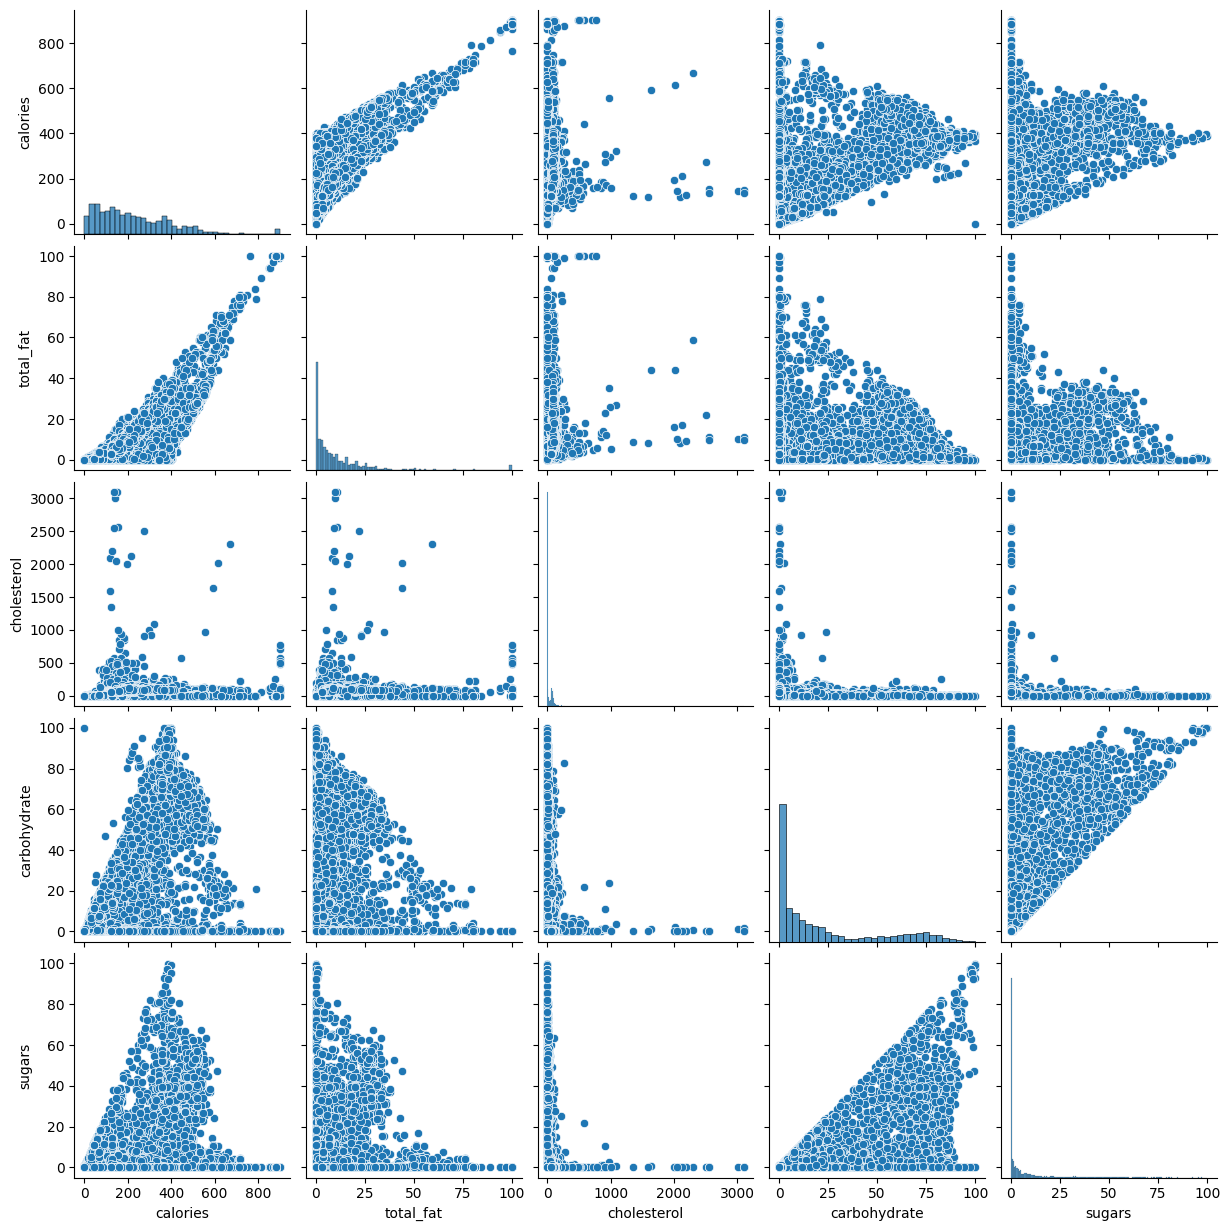

In [56]:
sns.pairplot(df_foods)

### Aplicando Modelo **Regresion Linear**

In [57]:
model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)

### Evaluacion

In [58]:
print(mean_absolute_error(y_test,y_pred))

32.96779531087401


In [59]:
mse = mean_squared_error(y_test,y_pred)

In [60]:
print(np.sqrt(mse))

41.19607916463686


### Aplicando **Arbol de Decision de Regresion**

In [61]:
model = DecisionTreeRegressor(max_depth= 5).fit(X_train,y_train)
y_pred = model.predict(X_test)

### Evaluacion

In [62]:
print(mean_absolute_error(y_test,y_pred))

24.76300879969319


In [63]:
print(r2_score(y_test,y_pred))

0.9544510991294037
